YT: RandomMathsInc: Monte Carlo Method

In [16]:
import math
import random

def function (x) :
    return math.log(x) / x
    #Funktion einsetzten, welche integriert werden soll

count = 0.0
in_area = 0.0

while count < 100000:

    x_coord = random.uniform(1, 10)
    #In den Grenzen von [1, 10]; X-Koordinaten Definitonsbereich 
    y_coord = random.uniform(0, 1/math.e)
    #Mit [0, 1/e] Y-Koordinaten Wertebereich
    
    if y_coord < function(x_coord):
        in_area += 1
    count += 1

area_box = 9 / math.e 

result = (in_area / count)*area_box

print(result)


2.659062031142479


YT: Andrew Dotson: Monte Carlo Integration in Python

Text(0.5, 0, 'Fläche')

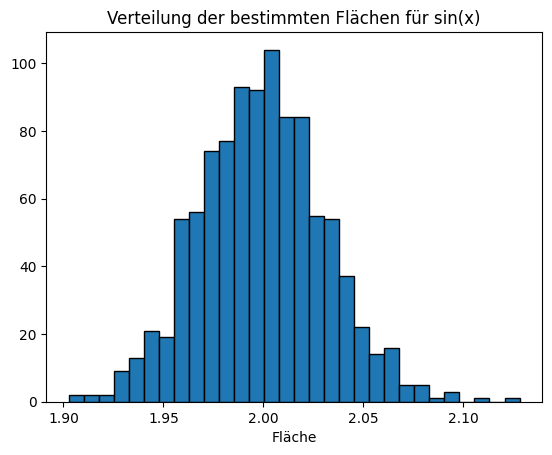

In [17]:
%matplotlib inline
import random 
import numpy as np
import matplotlib.pyplot as plt

a = 0 
b = np.pi #limits of integration 
N = 1000 

def func(x):
    return np.sin(x) 

areas = [] 

for i in range(N):
    xrand = np.zeros(N)

    for i in range(len(xrand)):
        xrand[i] = random.uniform(a, b) 
        integral = 0.0
    
    for i in range(N):
        integral += func(xrand[i])

    answer = (b-a)/float(N)*integral 
    #print("Das Integral von 0 bis pi von sin(x) ist:", answer)
    areas.append(answer)

plt.title("Verteilung der bestimmten Flächen für sin(x)")
plt.hist(areas, bins = 30, ec = 'black')
plt.xlabel("Fläche")

YT: Normalized Nerd: Markov Chains

Zunnächste den Code laufen lassen!

In [22]:
import numpy as np

state = {
    0 : "Zustand A",
    1 : "Zustand B",
    2 : "Zusatnd C"
}

A = np.array ([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])

n = 4
start_state = 0
print(state[start_state], "-->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0,1,2], p=A[prev_state])
    print(state[curr_state], "-->", end=" ")
    prev_state = curr_state
    n-=1
print("stop")



Zustand A --> Zustand A --> Zustand A --> Zustand B --> stop


1 Ansatz: Mont Carlo 

In [25]:
steps = 10**6
start_state = 0
pi = np.array([0, 0, 0,])
pi[start_state] = 1
prev_state = start_state

i = 0
while i<steps:
    curr_state = np.random.choice([0, 1, 2], p=A[prev_state])
    pi[curr_state]+=1
    prev_state = curr_state
    i +=1

print("\pi = ", pi/steps)

\pi =  [0.351768 0.210831 0.437402]


2 Ansatz: Wiederholte Matrix Multiplikation

In [28]:
steps = 10**3
A_n = A

i = 0 
while i<steps:
    A_n = np.matmul(A_n, A)
    i += 1

print("A^n = \n", A_n, "\n")
print("\pi = ", A_n[0])

A^n = 
 [[0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]] 

\pi =  [0.35211268 0.21126761 0.43661972]


3 Ansatz: Linke Eigenvektoren

In [32]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("Linke Eigenvektoren = \n", left, "\n")
print("Eigenwerte = \n", values)

pi = left[:,0]
pi_normalisiert = [(x/np.sum(pi)).real for x in pi]
pi_normalisiert

Linke Eigenvektoren = 
 [[-0.58746336+0.j         -0.16984156-0.35355339j -0.16984156+0.35355339j]
 [-0.35247801+0.j          0.67936622+0.j          0.67936622-0.j        ]
 [-0.72845456+0.j         -0.50952467+0.35355339j -0.50952467-0.35355339j]] 

Eigenwerte = 
 [ 1.  +0.j        -0.15+0.3122499j -0.15-0.3122499j]


[0.3521126760563379, 0.21126760563380298, 0.43661971830985913]